# Practica 1 APC: Reconeixement de gènere per la veu

Aquesta base de dades es va crear per identificar una veu com masculina o femenina, segons les propietats acústiques de la veu i la parla. El conjunt de dades consta de 3.168 mostres de veu gravades, recopilades de parlants masculins i femenins.  Les mostres de veu s'han processat i extret 21 propietats acústiques de cada veu diferents, com per exemple freqüència màxima (freqüència amb més energia) o la freqüència mitjana de la pista d’àudio.

## Lectura de la base de dades
Primerament afegim les dades de la base de dades (BBDD) a la variable 'dataset', aquí trobarem disponibles totes les dades, tant les numèriques com les no numèriques ('label', es a dir, home o dona).

In [44]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
sns.set()

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('voice.csv')

Com hem mencionat, una de les dades de la nostra BBDD és un string, per tant, per poder treballar còmodament haurem de canviar la columna del gènere per a que sigui numèrica. Així doncs, establirem que els homes tindran el valor 0 en la columna de 'label', mentre que les dones, en aquest cas, el valor 1.

In [45]:
dataset = dataset.replace('male', 0)
dataset = dataset.replace('female', 1)
data = dataset.values

print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (3168, 21)


## Verificació de les dades
Seguidament, per començar a treballar, comprovem que no hi ha valors nuls, es a dir, que cap variable tingui una dada buida:

In [46]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


Efectivament, veiem que tots els registres són correctes. Això pot ser degut a que tota pista de àudio té uns valors matemàtics darrera, es a dir, no pot haver cap valor nul ja que sempre s'enregistra alguna freqüència. Per tant, com la majoria dels atributs de la nostra base de dades són dades estadístiques, sempre hi haurà dades per poder-los deduir.

## Anàlisi de dades (apartat C de la pràctica)
### Obtenció del objectiu i els candidats
En aquest apartat s'indaga en les dades per tal d’estudiar i analitzar tots els atributs per distingir quins semblen ser més determinants a la hora de predir el gènere del subjecte.

En aquest projecte hem considerat que intentar predir el atribut ‘meanfun’, era el més adient. Aquest atribut el trobem interessant ja que té a veure amb la musicalitat de la veu. Concretament ‘meanfun’ vol dir freqüència fonamental. En un so hi han moltes freqüències simultànies ja que la ona del so per força quan s'expandeix, la fonamental, és la freqüència original del so, la "nota" que inicia el so i aquesta després es veu acompanyada pels seus harmònics (sons extra).


In [47]:
s_target = "meanfun"
target = dataset.columns.get_loc(s_target)
atributs = dataset.drop(dataset.columns[target], axis='columns').columns
aux = ""
for i in atributs:
    aux += i + " "
    
print("Atributs: ", aux)
print("Target: ", s_target)

Atributs:  meanfreq sd median Q25 Q75 IQR skew kurt sp.ent sfm mode centroid minfun maxfun meandom mindom maxdom dfrange modindx label 
Target:  meanfun


Per a intentar deduir quin és el atribut més important alhora de predir el ‘meanfun’, el millor recurs per aquesta tasca és un heatmap. 

Un heatmap és una matriu que representa gràficament la correlació entre els atributs de la nostre base de dades. La correlació és un coeficient estadístic que mesura com de relacionats estan dos atributs. Poden agafat valors entre el 1 i el -1. Com més proper sigui el valor a 1 o -1, més correlació hi ha entre les variables (positiva o  negativa). És per això que el que ens importa en aquest cas és trobar els atributs que més correlació tinguin amb el nostre atribut target en valor absolut.

<IPython.core.display.Javascript object>


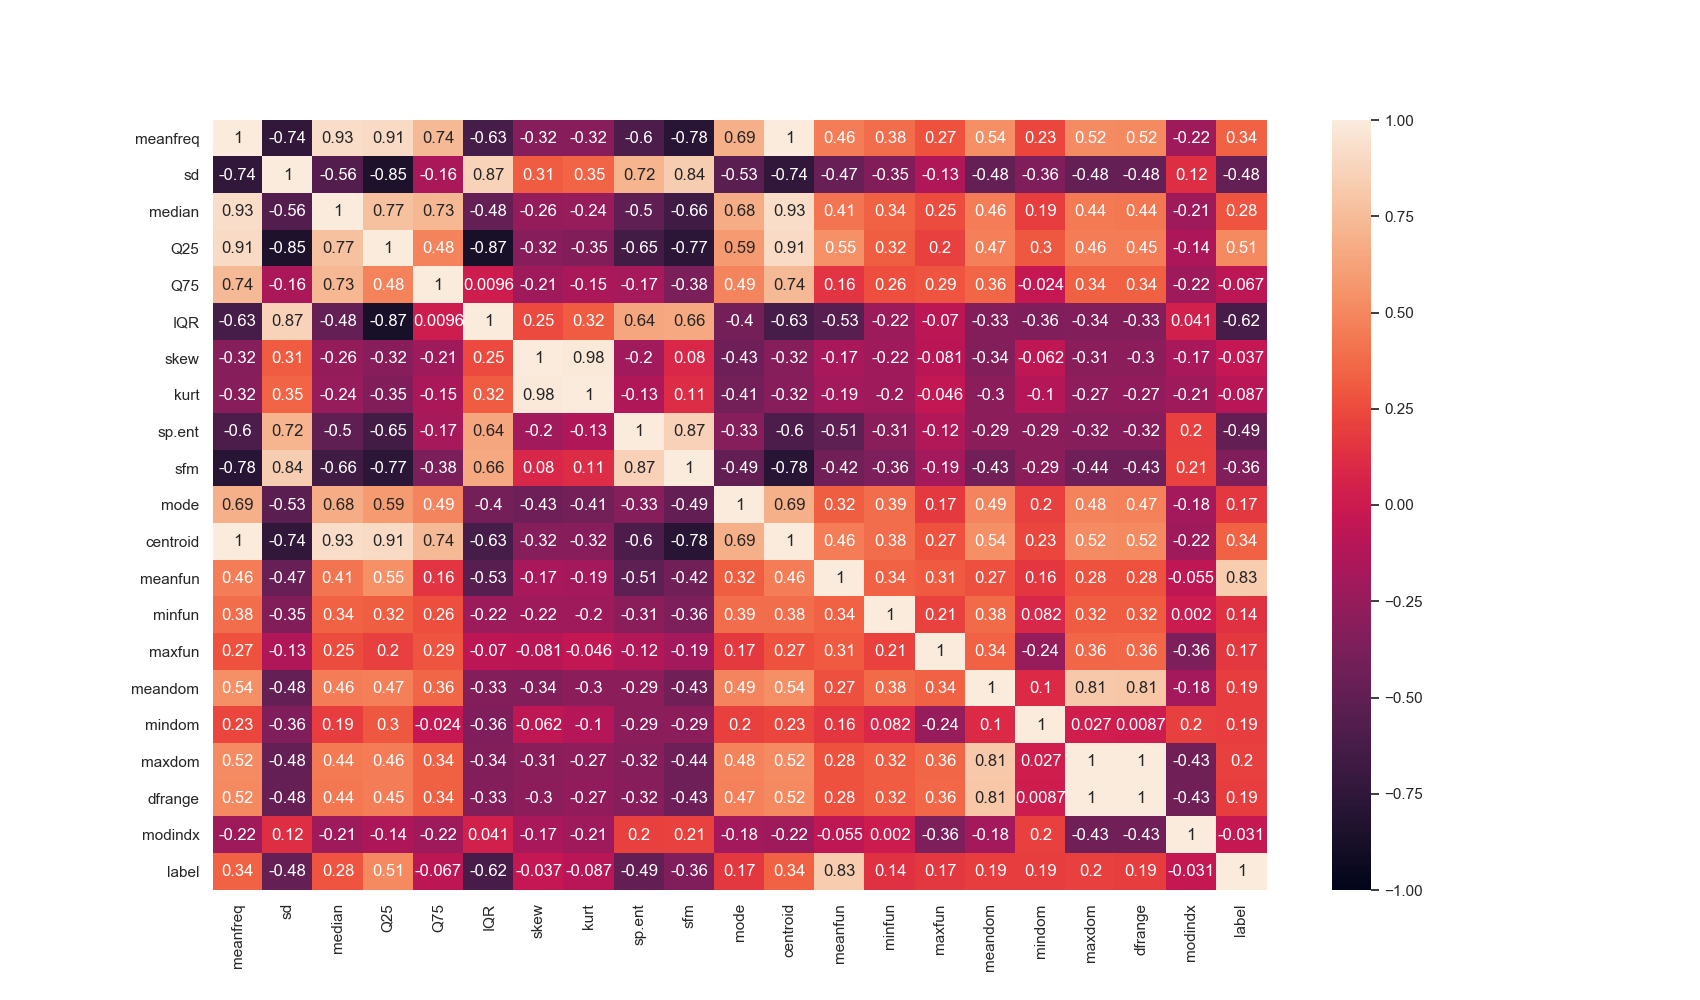

In [48]:
import seaborn as sns
correlation_heatmap = plt.figure(figsize=(17,10))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

Com podem veure les variables amb més correlació amb el target són: label (gènere), Q25, IQR, sp.ent. Aquests elements seràn els nostres candidats. 

A continuació creem una llista amb els candidats, per índex i per nom:


In [49]:
s_candidats = ['label','Q25', 'IQR', 'sp.ent']
candidats = [dataset.columns.get_loc(i) for i in s_candidats]
print("Index candidats", candidats)

Index candidats [20, 3, 5, 8]


### Estudi de la distribució dels candidats

In [50]:
def plt_hist(data1, i):
    fi = plt.figure()
    kwargs = dict(alpha=0.5, bins=31, density=True, stacked=True, range=[np.min(data1[:,i]), np.max(data1[:,i])], histtype="bar", rwidth=0.8)
    plt.hist(data1[:,i], **kwargs, color='b')
    plt.gca().set(title='Número de mostres en cada interval', ylabel='Numero')

#### - Label

<IPython.core.display.Javascript object>


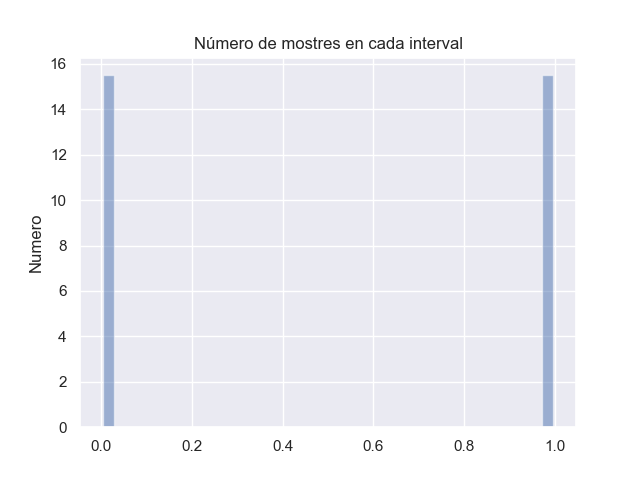

[Text(0, 0.5, 'Numero'), Text(0.5, 1.0, 'Número de mostres en cada interval')]

In [51]:
fi = plt.figure()
i = candidats[0]
kwargs = dict(alpha=0.5, bins=31, density=True, stacked=True,range=[0, 1], histtype="bar", rwidth=0.8)
plt.hist(data[:,i], **kwargs, color='b')
plt.gca().set(title='Número de mostres en cada interval', ylabel='Numero')

#### - Q25

<IPython.core.display.Javascript object>


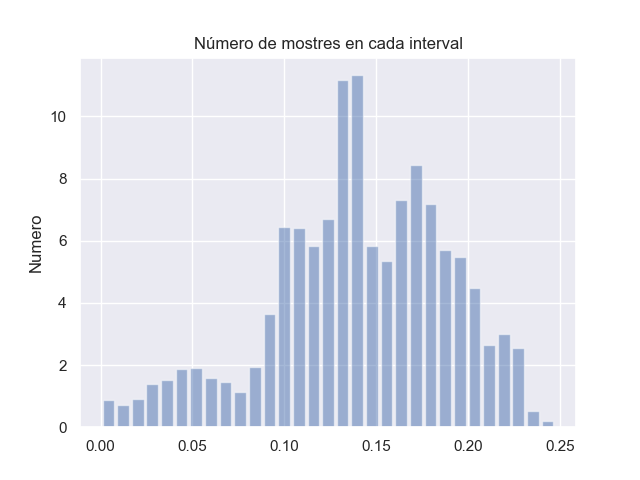

In [52]:
plt_hist(data,candidats[1])

#### - IQR

<IPython.core.display.Javascript object>


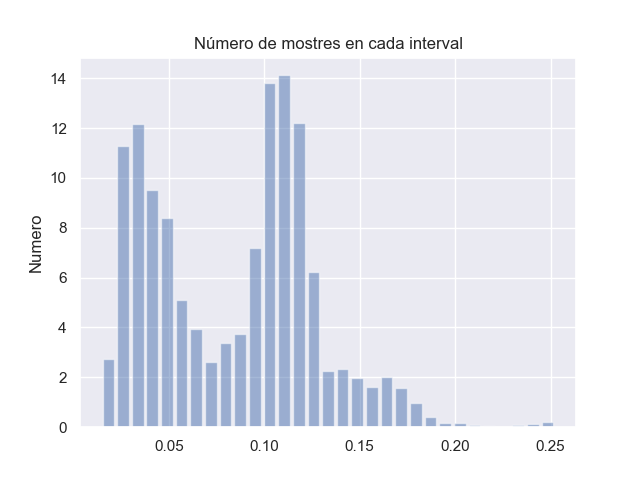

In [53]:
plt_hist(data,candidats[2])

#### - sp.ent

<IPython.core.display.Javascript object>


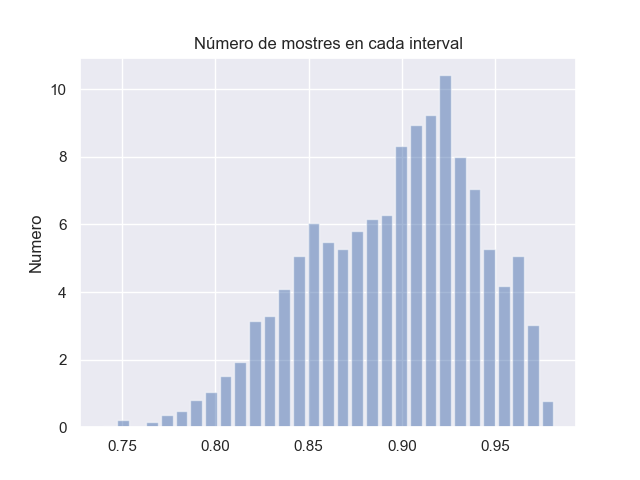

In [54]:
plt_hist(data,candidats[3])

Podem veure en els diferents programes quin tipus de distribució tenen els nostres candidats.
Es pot apreciar com el gènere, és binari, ja que en aquest cas, només es contempla home i dona com a gèneres i es consideren mútuament exclusius. Aquest factor és important ja que un atribut binari no és vàlid per al entrenament de un regressor lineal. Per tant, hem de descartar el gènere com a candidat.

La distribució que ens interessa és una distribució normal, aquella on la majoria de casos tenen un valor entremig d’entre el màxim i mínim del valor, de forma que un histograma com els anteriors, ha de tenir forma de ‘muntanya’. Aquest fet fa que l'entrenament del regressor sigui eficient ja que es centrarà en els valors entremitjos.

El IQR (inter quartile range) no segueix distribució normal, es per això que no es bon candidat, ja que el regressor acabaria predint sempre els valors entre els pics (valors de la vall) perquè és l'única manera d'estar a poca distància dels dos pics.
Per això també l'hem de descartar.

Tant el Q25 com el sp.ent tenen una distribució força normal, això els converteix en bons candidats.

In [55]:
s_candidats = ['Q25', 'sp.ent']
candidats = [dataset.columns.get_loc(i) for i in s_candidats]
print("Index candidats", candidats)

Index candidats [3, 8]


### Conclusions anàlisi de dades
Vist tot això, queda entrenar el model de regressió i posteriorment avaluar els resultats. Com a conclusió del anàlisi va bé mostrar els núvols de punts de les nostres variables candidates. Ho farem amb un pairplot, un gràfic que ens permet visualitzar els núvols i la distribució alhora de manera que és una bona manera de concloure amb l'apartat del anàlisi de dades.

<IPython.core.display.Javascript object>


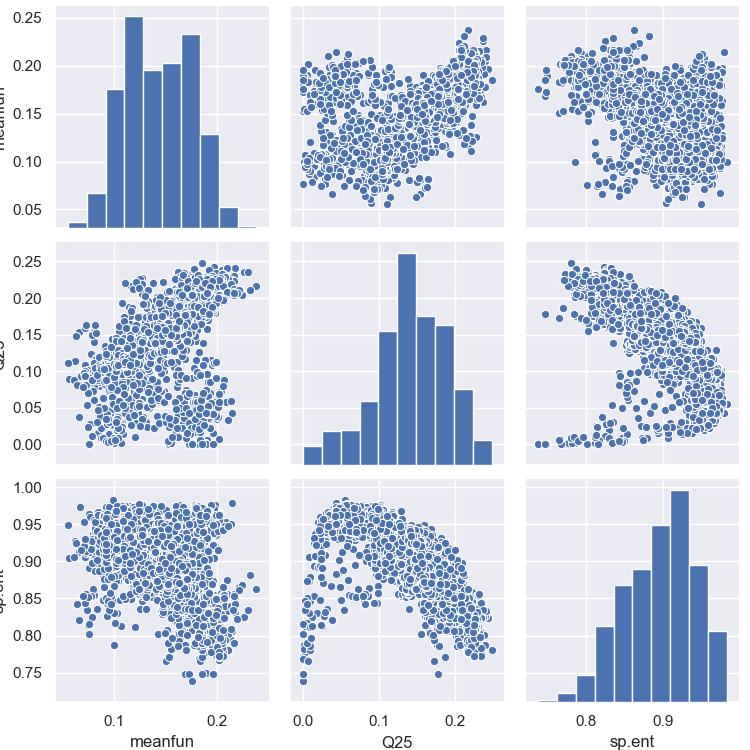

In [56]:
temp = [target]
for i in candidats:
    temp.append(i)
pairplot = sns.pairplot(dataset.iloc[:,temp])

## Regressió

Un cop hem analitzat les dades i tenim una idea de què pot ser determinant alhora de predir el ‘meanfun’, podem començar a construir el model de regressió lineal.

El primer que hem de fer és establir les dades d'entrada i les de sortida. Les nostres variables de sortida o de output del model supervisat, són els valors del ‘meanfun’ que tenim a la base de dades, mentre que les variables d'entrada o input són les columnes del database que no són el ‘meanfun’.

In [57]:
y = dataset.values[:,target]
x = dataset.drop(dataset.columns[target],axis='columns').values
#Convertim les dades al tipus float de numpy, per a poder utilitzar les seves funcionalitats
x = x.astype(np.float64)
y = y.astype(np.float64)

print("Rang de x: [", np.min(x), ", ", np.max(x),"]")
print("Rang de y: [", np.min(y), ", ", np.max(y),"]")

Rang de x: [ 0.0 ,  1309.61288737064 ]
Rang de y: [ 0.0555653493134555 ,  0.237636387269209 ]


### Estandarització

L'estandarització és un procés que s'assegura que les dades són consistents

In [58]:
def standarize(x):
    mean = x.mean(0)
    std = x.std(0)
    if len(x.shape) > 1:
        x_t = x - mean[None, :]
        x_t /= std[None, :]
    else:
        x_t = x - mean
        x_t /= std
    return x_t


In [59]:
x = standarize(x)
y = standarize(y)
print("Rang després de la estandarització: ")
print("Rang de x: [", np.min(x), ", ", np.max(x),"]")
print("Rang de y: [", np.min(y), ", ", np.max(y),"]")

Rang després de la estandarització: 
Rang de x: [ -7.692594855880393 ,  9.436433926721149 ]
Rang de y: [ -2.7010273954866326 ,  2.9359631410130613 ]


### Normalització

Per a la òptima regressió, és necessari normalitzar les dades. Això es fa per que totes les dades han d'estar compreses entre el mateix rang, si no el model donaria més importància a un atribut pel simple fet de per tenir un rang de valor més gran.

In [60]:
def normalitze(x):
    minim = np.min(x)
    maxim = np.max(x)
    x = (x - minim)/(maxim-minim)
    return x

In [61]:
x = normalitze(x)
y = normalitze(y)
print("Rang després de la estandarització: ")
print("Rang de x: [", np.min(x), ", ", np.max(x),"]")
print("Rang de y: [", np.min(y), ", ", np.max(y),"]")

Rang després de la estandarització: 
Rang de x: [ 0.0 ,  1.0 ]
Rang de y: [ 0.0 ,  1.0 ]


Podem comprobar com la distribució continua sent la mateixa que abans de tot aquest tractament de dades:

Distribució  Q25


<IPython.core.display.Javascript object>


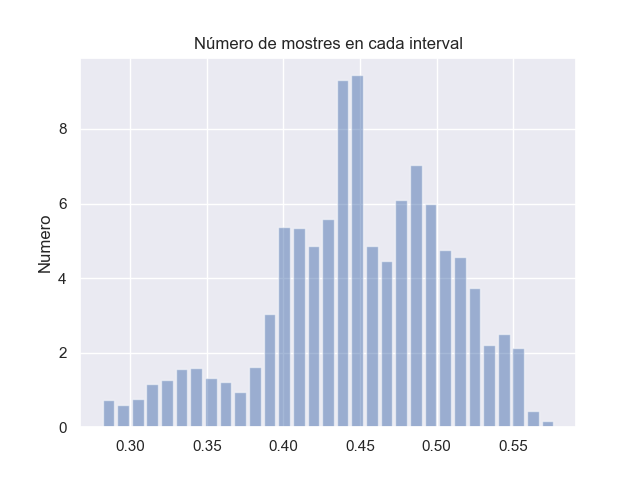

Distribució  sp.ent


<IPython.core.display.Javascript object>


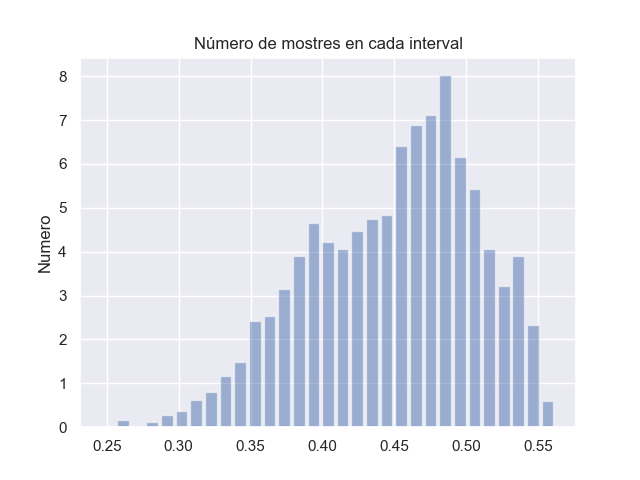

In [62]:
print("Distribució ",s_candidats[0])
plt_hist(x,candidats[0])
print("Distribució ",s_candidats[1])
plt_hist(x,candidats[1])

### Cross validation

Ja que la nostra base de dades és prou extensa podem dividir el dataset en 3 parts: train, validation, test. Amb uns percentatges del 0,6%, 0,2%, 0,2%.

Amb el trainset el que farem serà entrenar al model per a que s'ajusti a les nostres dades donat un atribut concret com a input. El validationset és el que ens farà determinar quin atribut és millor per a predir el ‘meanfun’, i el testset serà la prova final del model, on es veurà el rendiment d'aquest i podrem comprovar si és un bon predictor o no.

In [63]:
def split_data(x, y, train_ratio=0.6):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    
    n_train = int(np.floor(x.shape[0]*train_ratio))
    n_test_val = int(np.floor(x.shape[0]*(1-train_ratio)*0.5))
    
    indices_train = indices[:n_train]
    indices_val = indices[n_train:n_train+n_test_val] 
    indices_test = indices[-n_test_val:]
    
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    
    x_test = x[indices_test, :]
    y_test = y[indices_test]
                     
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_test, y_test, x_val, y_val

In [64]:
x_train, y_train, x_test, y_test, x_val, y_val = split_data(x, y)
print("Train set: ", x_train.shape)
print("Test set: ", x_test.shape)
print("Validation set: ", x_val.shape)

Train set:  (1900, 20)
Test set:  (633, 20)
Validation set:  (633, 20)


Un cop tenim el dataset dividit per a la cross validation, hem de començar a entrenar el model de regressió lineal per a tots els atributs, utilitzant el train set. Un cop hem entrenat el model, hem de calcular el error quadràtic mitja per cada atribut.
D'aquesta manera podrem comprobar empiricament quins atributs són millors per a deduir el nostre target.

In [65]:
def mse(v1, v2):
    assert(len(v1) == len(v2))
    return ((v1 - v2)**2).mean()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regression(x, y):
    regr = LinearRegression()
    regr.fit(x, y)
    return regr

In [66]:
mse_score_list = []
pred = []
for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train) 
    pred.append(regr.predict(x_v))
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))
    mse_score_list.append(error)
    
    print("Error en atribut %s: %f" %(atributs[i], error))
    print("R2 score en atribut %s: %f" %(atributs[i], r2))
    print("")
pred = np.array(pred)

Error en atribut meanfreq: 0.023596
R2 score en atribut meanfreq: 0.246988

Error en atribut sd: 0.022820
R2 score en atribut sd: 0.271738

Error en atribut median: 0.025334
R2 score en atribut median: 0.191501

Error en atribut Q25: 0.020415
R2 score en atribut Q25: 0.348490

Error en atribut Q75: 0.030636
R2 score en atribut Q75: 0.022324

Error en atribut IQR: 0.020659
R2 score en atribut IQR: 0.340718

Error en atribut skew: 0.030655
R2 score en atribut skew: 0.021700

Error en atribut kurt: 0.030257
R2 score en atribut kurt: 0.034396

Error en atribut sp.ent: 0.021826
R2 score en atribut sp.ent: 0.303461

Error en atribut sfm: 0.024445
R2 score en atribut sfm: 0.219891

Error en atribut mode: 0.027553
R2 score en atribut mode: 0.120685

Error en atribut centroid: 0.023596
R2 score en atribut centroid: 0.246988

Error en atribut minfun: 0.027622
R2 score en atribut minfun: 0.118486

Error en atribut maxfun: 0.028048
R2 score en atribut maxfun: 0.104887

Error en atribut meandom: 0.

In [67]:
resultats = np.array(mse_score_list)
winners = np.argsort(resultats)[:4]
aux = ""
for i in winners:
    aux += atributs[i] + " "
print("Atributs guanyadors: ", aux)

Atributs guanyadors:  label Q25 IQR sp.ent 


El resultat del regressor ha sigut el esperat, els atributs que han obtingut millor resultat han sigut els mateixos quatre que havíem determinat com als més interessants, seguint el ordre de més correlació a menys.

Un cop escollit els atributs guanyadors, avaluem el model amb el conjunt de test:

In [68]:
mse_score_list = []
regs = []
for i in range(len(winners)):
    x_t = x_train[:,winners[i]] # seleccionem atribut i en conjunt de train
    x_tes = x_test[:,winners[i]] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_tes = np.reshape(x_tes,(x_tes.shape[0],1))
    regr = regression(x_t, y_train)
    regs.append(regr)
    pred = regr.predict(x_tes)
    error = mse(y_val, regr.predict(x_tes)) # calculem error
    mse_score_list.append(error)



In [69]:
for i in range(len(winners)):
    print("Cost final del atribut ", atributs[winners[i]], ": ", mse_score_list[i]) 


Cost final del atribut  label :  0.054508171367497145
Cost final del atribut  Q25 :  0.03962565995690836
Cost final del atribut  IQR :  0.04013894370951726
Cost final del atribut  sp.ent :  0.03957360438802174


Es pot comprovar com el cost dels nostres guanyadors en el testset obtenen un resultat semblant al que havien obtingut en el validationset.

### Representació dels resultats
En aquest moments ja tenim un model entrenat capaç de predir el ‘meanful’ a partir de varis atributs diferents. Per a la fàcil visualització dels resultats del model representarem els resultats en una gràfica on es puguin veure els punts que representen els valors a predir, i la recta de regressió que representa la predicció del nostre model.

Resultat Regressió atribut label


<IPython.core.display.Javascript object>


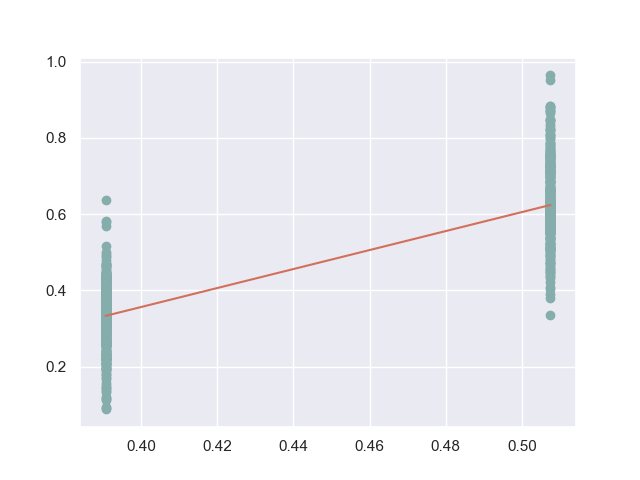

In [70]:
w = 0
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, regs[w].predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]],y_test, color='#84adac')

En aquesta gràfica es pot veure perquè en la fase d'anàlisis es va descartar l'atribut label com a candidat. El fet de ser binari fa que la recta simplement s'acomodi a la meitat de les dues columnes de punts.

Resultat Regressió atribut Q25


<IPython.core.display.Javascript object>


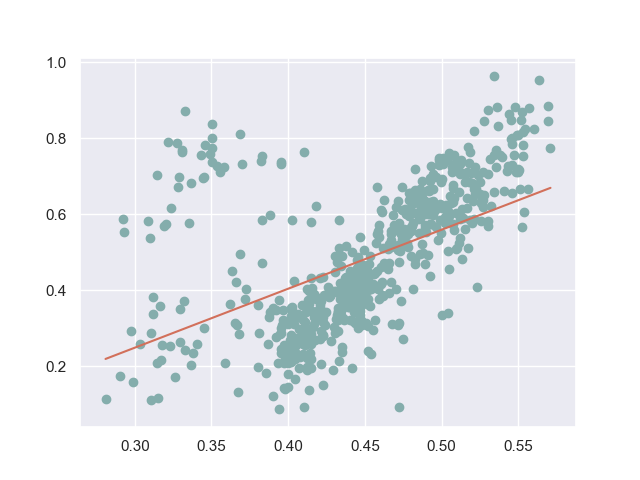

In [71]:
w = 1
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, regs[w].predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]],y_test, color='#84adac')

Resultat Regressió atribut IQR


<IPython.core.display.Javascript object>


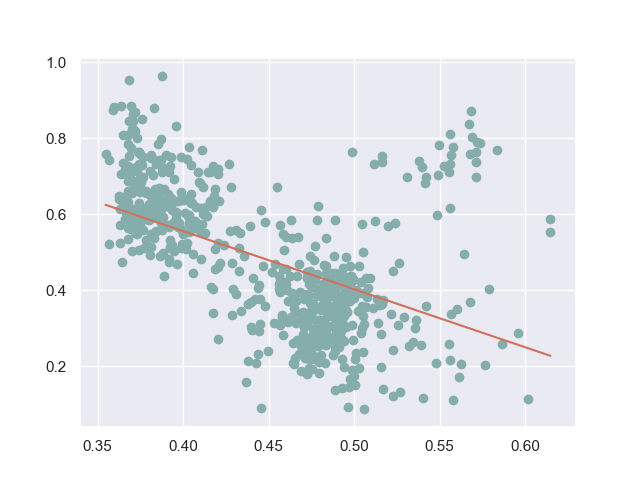

In [72]:
w = 2
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, regs[w].predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]],y_test, color='#84adac')

Resultat Regressió atribut sp.ent


<IPython.core.display.Javascript object>


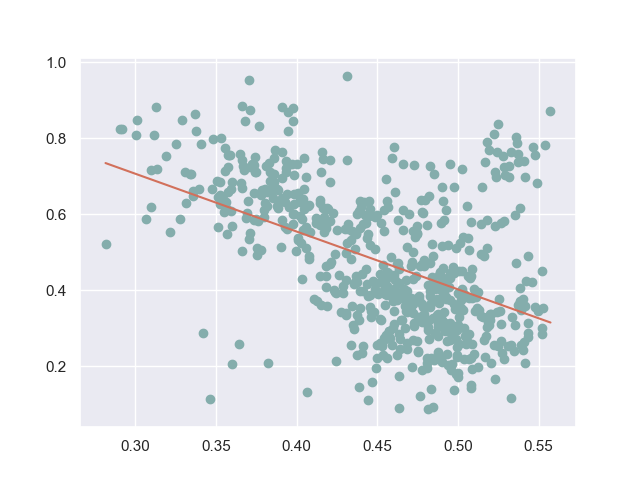

In [73]:
w = 3
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, regs[w].predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]],y_test, color='#84adac')

### Conclusions regressió
Com a conclusió podem dir que els resultats del model han sigut els esperats, però es veu gràficament com un model multivariat hagués sigut més adequat per aquest problema. Una recta lineal no es pot acomodar bé al núvol de punts, en canvi una corba podria assolir millor la tasca de predicció.

<IPython.core.display.Javascript object>


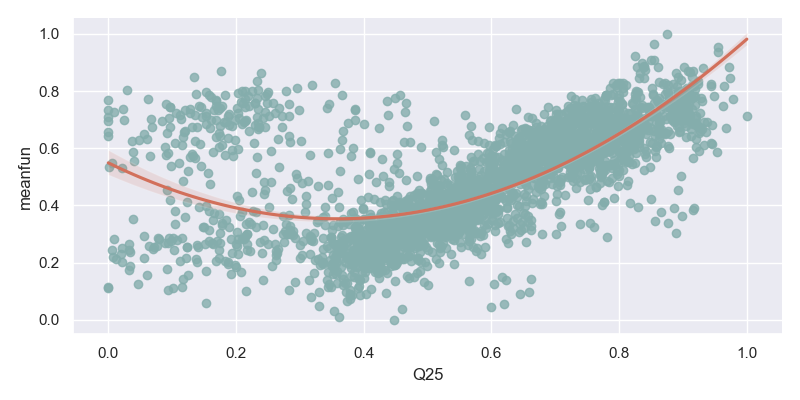

<IPython.core.display.Javascript object>


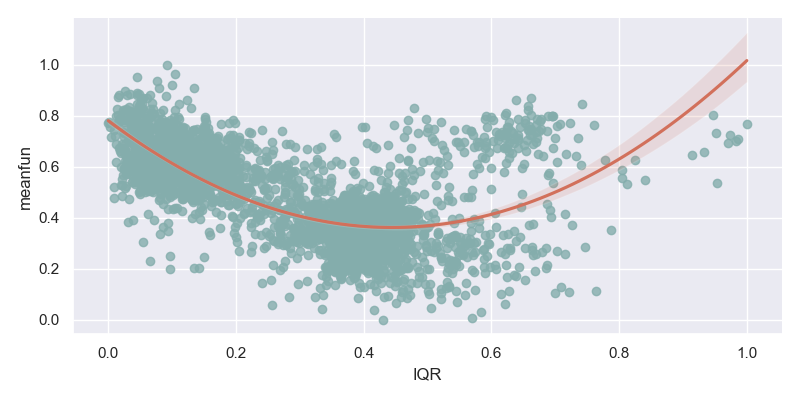

<IPython.core.display.Javascript object>


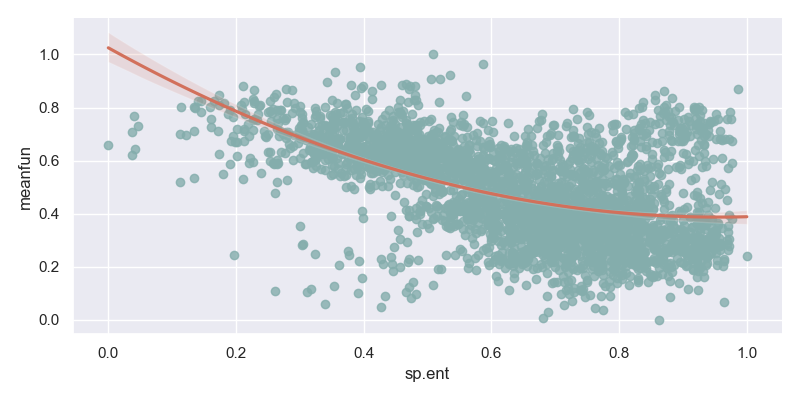

In [74]:
from sklearn import preprocessing

A = data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(A)

normalized_dataframe = pd.DataFrame(x_scaled)
normalized_dataframe.columns = dataset.columns
sns.lmplot("Q25", "meanfun", normalized_dataframe, order = 2, height = 4, aspect = 2, line_kws={'color': '#d2705b'}, scatter_kws={'color':'#84adac'});
sns.lmplot("IQR", "meanfun", normalized_dataframe, order = 2, height = 4, aspect = 2, line_kws={'color': '#d2705b'}, scatter_kws={'color':'#84adac'});
sns.lmplot("sp.ent", "meanfun", normalized_dataframe, order = 2, height = 4, aspect = 2, line_kws={'color': '#d2705b'}, scatter_kws={'color':'#84adac'});

A més a més també podem dir que predir el ‘meanfun’ té bastanta relació amb predir el gènere de la persona del àudio ja que el ‘meanfun’ té molta correlació, com es veu en el heatmap, amb el gènere. D'aquesta manera predint el ‘meanfun’ a partir de un atribut com el Q25 o el IQR, d’alguna manera podríem preveure el gènere, sempre amb marge de error.

## El nostre model del regressor


In [75]:
class Regressor(object):
    def __init__(self, w0, w1, alpha, lamda):
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha
        self.lamda = lamda
        self.cost = []
        self.iteracions = 0
        
    def predict(self, x):
        return self.w0 + (x * self.w1)
        
    
    def __update(self, hy, y, x):
        if len(self.cost) == 0:
            jw = (1 / (2*len(hy))) * (np.sum((hy - y) ** 2) + (self.lamda * ((self.w0 ** 2) + (self.w1 ** 2))))
            self.cost.append(jw)
        self.w0 = self.w0 - ((self.alpha / len(hy)) * np.sum(hy - y))
        m = (self.alpha * self.lamda / len(hy))
        self.w1 = (self.w1 * (1 - m)) - (m * np.sum((hy - y) * x))
        jw = (1 / (2*len(hy))) * (np.sum((hy - y) ** 2) + (self.lamda * ((self.w0 ** 2) + (self.w1 ** 2))))
        self.cost.append(jw)
        
        
    def train(self, max_iter, epsilon, x, y):
        parar = False
        while parar == False and max_iter > self.iteracions:
                hy = self.predict(x)
                self.__update(hy, y, x)
                self.iteracions += 1
                if ((self.cost[-2] - self.cost[-1]) / self.cost[-2]) < epsilon and self.iteracions > 1:
                    parar = True

S'ha implementat un model de regressor lineal univariat, al igual que als apartats anteriors l'objectiu és estudiar com el nostre regressor funciona respecte al regressor donat per la llibreria sklearn. 
Primer hem d'entrenar el regressor amb la mostra de train. En aquest cas entrenarem dos regressors diferents, amb els següents paràmetres: 
- (ε = 5%, α = 0.1, λ = 1.0)
- (ε = 0.01%, α = 0.1, λ = 1.0) 

Les iteracions màximes en els dos casos seran de 2500, en principi amb el primer regressor no s’arribarà a aquest nombre màxim d'iteracions i es podrà veure que en aquest cas el nostre regressor tindrà un MSE major que no pas el de la llibreria sklearn, en canvi si el comparem amb el segon, podrem veure que en aquest cas el nostre és millor.

In [76]:
reg1 = Regressor(10.0, 10.0, 0.1, 1.0)
reg1.train(2500, 0.05, x_train[:, winners[2]], y_train)
print("S'ha arribat a un cost:", reg1.cost[-1], "en", reg1.iteracions, "iteracions.")

S'ha arribat a un cost: 0.09982371233994221 en 35 iteracions.


In [77]:
reg2 = Regressor(10.0, 10.0, 0.1, 1.0)
reg2.train(2500, 0.0001, x_train[:, winners[2]], y_train)
print("S'ha arribat a un cost:", reg2.cost[-1], "en", reg2.iteracions, "iteracions.")

S'ha arribat a un cost: 0.02597957975310654 en 2500 iteracions.


Un cop entrenats els models s'ha de veure com funcionen respecte el de la llibreria sklearn. 
Per veure les diferencies entre els dos haurem de mirar el MSE de cadascun: 

In [78]:
print("MSE sklearn: ", mse_score_list[2])
print("MSE primer regressor: ", mse(y_test, reg1.predict(x_test[:, 2])))
print("MSE segon regressor: ", mse(y_test, reg2.predict(x_test[:, 2])))

MSE sklearn:  0.04013894370951726
MSE primer regressor:  0.08338926450212959
MSE segon regressor:  0.02682803971616183


Com podem veure a en aquest cas amb 2.500 iteracions el nostre regressor és millor, haurem de fer el mateix amb tots el atributs per comprovar si això s'aplica a tota la resta d'atributs. Primer creem tots els regressors:

In [85]:
reg11 = Regressor(10.0, 10.0, 0.1, 1.0)
reg11.train(2500, 0.05, x_train[:, winners[1]], y_train)

reg12 = Regressor(10.0, 10.0, 0.1, 1.0)
reg12.train(2500, 0.0001, x_train[:, winners[1]], y_train)


reg21 = Regressor(10.0, 10.0, 0.1, 1.0)
reg21.train(2500, 0.05, x_train[:, winners[2]], y_train)

reg22 = Regressor(10.0, 10.0, 0.1, 1.0)
reg22.train(2500, 0.0001, x_train[:, winners[2]], y_train)


reg31 = Regressor(10.0, 10.0, 0.1, 1.0)
reg31.train(2500, 0.05, x_train[:, winners[3]], y_train)

reg32 = Regressor(10.0, 10.0, 0.1, 1.0)
reg32.train(2500, 0.0001, x_train[:, winners[3]], y_train)

Com havíem dit en l'apartat anterior no crearem un regressor per l'atribut 0 (gènere) ja que es tracta d'un atribut binari.
A continuació podrem veure com varien els MSE segons el tipus de regressor que fem servir. Agafarem les dades del model sklearn d'apartats anteriors.

<IPython.core.display.Javascript object>


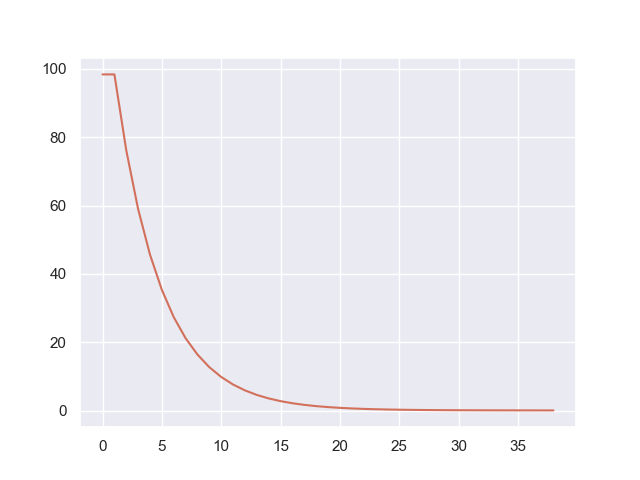

In [92]:
klk =plt.figure()
xax=[i for i in range(0,39)]
plt.plot(xax, reg11.cost, color='#d2705b')

In [80]:
print("MSE sklearn per Q25: ", mse_score_list[1])
print("MSE primer regressor Q25: ", mse(y_test, reg11.predict(x_test[:, 1])))
print("MSE segon regressor Q25: ", mse(y_test, reg12.predict(x_test[:, 1])), "\n")

print("MSE sklearn per IQR: ", mse_score_list[2])
print("MSE primer regressor IQR: ", mse(y_test, reg21.predict(x_test[:, 2])))
print("MSE segon regressor IQR: ", mse(y_test, reg22.predict(x_test[:, 2])), "\n")

print("MSE sklearn per sp.ent: ", mse_score_list[3])
print("MSE primer regressor sp.ent: ", mse(y_test, reg31.predict(x_test[:, 3])))
print("MSE segon regressor sp.ent: ", mse(y_test, reg32.predict(x_test[:, 3])))

MSE sklearn per Q25:  0.03962565995690836
MSE primer regressor Q25:  0.16586829053955643
MSE segon regressor Q25:  0.0886991174578948 

MSE sklearn per IQR:  0.04013894370951726
MSE primer regressor IQR:  0.08338926450212959
MSE segon regressor IQR:  0.02682803971616183 

MSE sklearn per sp.ent:  0.03957360438802174
MSE primer regressor sp.ent:  0.07455252635529645
MSE segon regressor sp.ent:  0.02347990149861063


Podem veure que en els atributs IQR i sp.ent el nostre model de regressor és millor que no pas el de sklearn.
A continuació es troben els plots de cadascun dels atributs amb la corresponent recta de regressió.

Resultat Regressió atribut Q25


<IPython.core.display.Javascript object>


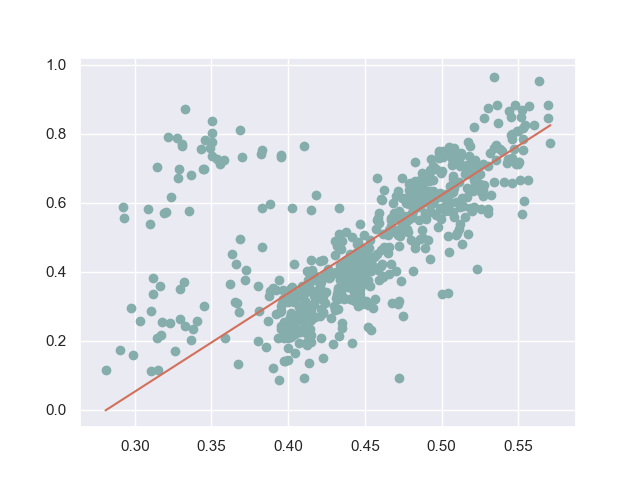

In [81]:
w = 1
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, reg12.predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]], y_test, color='#84adac')

Resultat Regressió atribut IQR


<IPython.core.display.Javascript object>


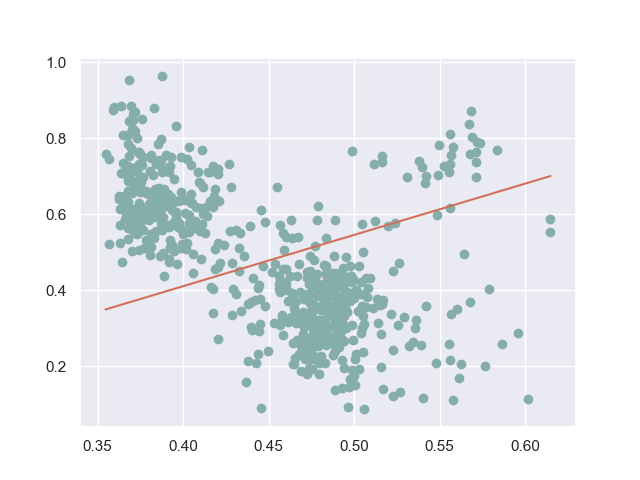

In [82]:
w = 2
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, reg22.predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]], y_test, color='#84adac')

Resultat Regressió atribut sp.ent


<IPython.core.display.Javascript object>


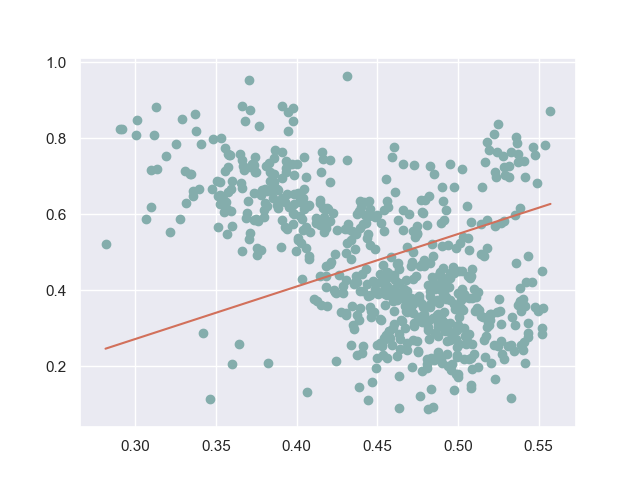

In [83]:
w = 3
print("Resultat Regressió atribut", atributs[winners[w]])
axisx = np.linspace(np.min(x_test[:,winners[w]]),np.max(x_test[:,winners[w]]),200)
axisx = np.reshape(axisx,(axisx.shape[0],1))
fig = plt.figure()
plt.plot(axisx, reg32.predict(axisx), color='#d2705b')
plt.scatter(x_test[:,winners[w]], y_test, color='#84adac')

Per acabar podem veure que la pendent de la recta ha canviat en els casos Q25 i sp.ent, fent que el MSE baixi en aquests dos casos respecte el model sklearn. 

Hem fet dos regressors de cada tipus de dada per veure que la diferencia no és gaire gran entre els tres (model amb 5% d'error, model de 2.500 iteracions i sklearn), tot i que el nombre d'iteracions si varia molt. 

Per tant es pot dir que si necessites repetir aquests càlculs molts cops el model ideal és un que faci menys iteracions i toleri un percentatge d'error més elevat.
En canvi, si el que busques és precisió el model amb 2.500 iteracions serà el que t'interessi.

## Conclusions
D'aquest projecte podem extreure moltes conclusions, respecte el model que hem construït estem molt satisfets ja que veiem que en alguns casos millora fins i tot al model implementat amb la llibreria sklearn, implementar aquest regressor ens ha ajudat a entendre molt millor la teoria i veure les formules aplicades a un problema real, el fet de poder veure les aplicacions que pot arribar a tenir aquest regressor dona un significat a tota la teoria que es dona a classe i permet aprendre d'una manera no tant teòrica que, al nostre parer, sempre és millor que no estudiar-la directament sense exemples.

Respecte al problema que hem hagut de fer front creiem que no ha estat excessivament difícil, tot i que és veritat que al principi, com molts altres projectes, costa començar-lo ja que no es sap ben be que s'ha de fer. Creiem que el nostre grup ha tingut la dificultat afegida de tenir una base de dades preparada per fer un regressor logístic més que no pas un regressor lineal, de totes maneres hem sabut trobar els atributs que es consideren més interesants tant per a fer un reconeixement de veu (regressor logístic) com per fer un regressor lineal.

Per acabar, es pot dir que la nostra elecció d'atribut objectiu és la millor que es podia fer en aquesta base de dades, l'atribut ‘meanfun’ tot i no ser el que major correlació tenia amb tots els altres, és un dels únics atributs que no era estadístic i és el principal per reconèixer si la veu d'una gravació pertany a un home o a una dona. Si haguéssim volgut construir un regressor logístic hauríem d'haver tingut forces més atributs en compte, però en el cas del regressor lineal funciona suficientment bé si es fa univariat.